In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df = pd.read_csv("online_retail_II.csv", sep=",")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [4]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10000,12680.00000,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15000,12680.00000,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15000,12680.00000,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95000,12680.00000,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00000,12680.00000,France


In [5]:
df= df.copy()

In [6]:
df.shape

(1067371, 8)

In [7]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [9]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [10]:
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.00000,9.93890,172.70579,-80995.00000,1.00000,3.00000,10.00000,80995.00000
Price,1067371.00000,4.64939,123.55306,-53594.36000,1.25000,2.10000,4.15000,38970.00000
Customer ID,824364.00000,15324.63850,1697.46445,12346.00000,13975.00000,15255.00000,16797.00000,18287.00000


In [13]:
df.describe([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,25%,50%,75%,95%,99%,100%,max
Quantity,1067371.00000,9.93890,172.70579,-80995.00000,-80995.00000,1.00000,1.00000,3.00000,10.00000,30.00000,100.00000,80995.00000,80995.00000
Price,1067371.00000,4.64939,123.55306,-53594.36000,-53594.36000,0.42000,1.25000,2.10000,4.15000,9.95000,18.00000,38970.00000,38970.00000
Customer ID,824364.00000,15324.63850,1697.46445,12346.00000,12346.00000,12681.00000,13975.00000,15255.00000,16797.00000,17911.00000,18207.00000,18287.00000,18287.00000


In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [15]:
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

In [16]:
df["Description"].nunique()

5698

In [17]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    5918
REGENCY CAKESTAND 3 TIER              4412
JUMBO BAG RED RETROSPOT               3469
ASSORTED COLOUR BIRD ORNAMENT         2958
PARTY BUNTING                         2765
Name: Description, dtype: int64

In [18]:
df.groupby("Description").agg({"Quantity": ["sum"]}).head()

,Quantity
,sum
Description,
DOORMAT UNION JACK GUNS AND ROSES,179
3 STRIPEY MICE FELTCRAFT,690
4 PURPLE FLOCK DINNER CANDLES,351
50'S CHRISTMAS GIFT BAG LARGE,1913
ANIMAL STICKERS,385


In [19]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=True).head()

,Quantity
Description,
?,-26757
given away,-20000
printing smudges/thrown away,-19200
missing,-16467
"Unsaleable, destroyed.",-15644


In [20]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,108545
WHITE HANGING HEART T-LIGHT HOLDER,93050
ASSORTED COLOUR BIRD ORNAMENT,81306
JUMBO BAG RED RETROSPOT,78090
BROCADE RING PURSE,70700


In [21]:
df["Invoice"].nunique()

53628

In [22]:
df.groupby("Invoice").agg({"Quantity": ["sum"]}).head()

,Quantity
,sum
Invoice,
489434,166
489435,60
489436,193
489437,145
489438,826


In [23]:
df.groupby("Invoice").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=True).head()

,Quantity
Invoice,
C524235,-87167
C581484,-80995
C541433,-74215
C536757,-18720
556691,-9600


In [24]:
df.groupby("Invoice").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Invoice,
518505,87167
524174,87167
497946,83774
581483,80995
541431,74215


In [25]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [26]:
df[df["Invoice"].str.contains("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65000,16321.00000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25000,16321.00000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10000,16321.00000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia


In [27]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [28]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [29]:
df.shape

(1047877, 8)

In [30]:
df[df["Invoice"].str.contains("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [31]:
df["Country"].nunique()

43

In [32]:
df["Country"].value_counts().head()

United Kingdom    964680
EIRE               17354
Germany            16703
France             13941
Netherlands         5093
Name: Country, dtype: int64

In [33]:
df[df["Country"] == "Germany"].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25000,12533.00000,Germany
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55000,12533.00000,Germany
581,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42000,12533.00000,Germany
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65000,12533.00000,Germany
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25000,12533.00000,Germany


In [34]:
df[df["Country"] == "Germany"].shape

(16703, 8)

In [35]:
df=df[df["Country"] == "Germany"]

In [36]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25000,12533.00000,Germany
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55000,12533.00000,Germany
581,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42000,12533.00000,Germany
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65000,12533.00000,Germany
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25000,12533.00000,Germany


In [37]:
df.shape

(16703, 8)

In [38]:
df.isnull().values.any()

False

In [39]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [40]:
df["Description"].nunique()

2410

In [41]:
df["Description"].value_counts().head()

POSTAGE                                645
ROUND SNACK BOXES SET OF4 WOODLAND     212
ROUND SNACK BOXES SET OF 4 FRUITS      137
WOODLAND CHARLOTTE BAG                 133
PLASTERS IN TIN WOODLAND ANIMALS       109
Name: Description, dtype: int64

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,16703.00000,13.65042,19.81889,1.00000,6.00000,10.00000,12.00000,600.00000
Price,16703.00000,3.59332,12.07654,0.00000,1.25000,1.95000,3.75000,715.02000
Customer ID,16703.00000,12639.25618,284.80580,12426.00000,12477.00000,12613.00000,12668.00000,14335.00000


In [43]:
df.describe([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,25%,50%,75%,95%,99%,100%,max
Quantity,16703.00000,13.65042,19.81889,1.00000,1.00000,2.00000,6.00000,10.00000,12.00000,36.00000,96.00000,600.00000,600.00000
Price,16703.00000,3.59332,12.07654,0.00000,0.00000,0.42000,1.25000,1.95000,3.75000,12.75000,18.00000,715.02000,715.02000
Customer ID,16703.00000,12639.25618,284.80580,12426.00000,12426.00000,12471.00000,12477.00000,12613.00000,12668.00000,12730.00000,13815.00000,14335.00000,14335.00000


In [44]:
df.groupby("Description").agg({"Quantity": ["sum"]}).head()

,Quantity
,sum
Description,
3 STRIPEY MICE FELTCRAFT,36
50'S CHRISTMAS GIFT BAG LARGE,60
CHERRY BLOSSOM DECORATIVE FLASK,16
DOLLY GIRL BEAKER,84
FLAMINGO LIGHTS,4


In [45]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
ROUND SNACK BOXES SET OF4 WOODLAND,2758
WOODLAND CHARLOTTE BAG,2610
ASSORTED COLOURS SILK FAN,2100
POSTAGE,2090
RED TOADSTOOL LED NIGHT LIGHT,1808


In [46]:
df["Invoice"].nunique()

789

In [47]:
df.groupby("Invoice").agg({"Quantity": ["sum"]}).head()

,Quantity
,sum
Invoice,
489526,484
490395,167
490563,372
490564,132
490682,68


In [48]:
df.groupby("Invoice").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Invoice,
552978,4282
530799,3556
516131,2567
504146,2108
537201,1944


In [49]:
df[df["Invoice"].str.contains("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [50]:
df.sort_values("Price", ascending= False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
266145,515128,M,Manual,1,2010-07-08 14:18:00,715.02000,12592.00000,Germany
923609,571223,M,Manual,1,2011-10-14 13:36:00,599.50000,13810.00000,Germany
981106,575632,M,Manual,1,2011-11-10 13:44:00,549.34000,12473.00000,Germany
713045,552980,POST,POSTAGE,1,2011-05-12 14:52:00,523.00000,12590.00000,Germany
981105,575632,M,Manual,1,2011-11-10 13:44:00,424.06000,12473.00000,Germany


In [51]:
df["TotalPrice"]= df["Price"]* df["Quantity"]

In [52]:
df["TotalPrice"].head()

579   15.00000
580   13.20000
581   10.50000
582   19.80000
583   15.00000
Name: TotalPrice, dtype: float64

In [53]:
df.groupby("TotalPrice").agg({"Quantity": ["sum"]}).head()

,Quantity
,sum
TotalPrice,
0.00000,20
0.00100,1
0.39000,1
0.42000,3
0.55000,2


In [54]:
df.groupby("TotalPrice").agg({"Quantity": ["sum"]}).sort_values("TotalPrice", ascending= False).head()

,Quantity
,sum
TotalPrice,
876.00000,80
715.02000,1
700.80000,128
624.00000,60
613.20000,56


In [55]:
df.groupby("Country").agg({"TotalPrice": ["sum"]}).head()

,TotalPrice
,sum
Country,
Germany,431262.46100


In [56]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25000,12533.00000,Germany,15.00000
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55000,12533.00000,Germany,13.20000
581,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42000,12533.00000,Germany,10.50000
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65000,12533.00000,Germany,19.80000
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25000,12533.00000,Germany,15.00000


In [57]:
df.dropna(inplace=True)

In [58]:
df.shape

(16703, 9)

In [59]:
print(df["InvoiceDate"].max())

2011-12-09 12:16:00


In [60]:
print(df["InvoiceDate"].min())

2009-12-01 11:50:00


In [61]:
today_date =dt.datetime(2011, 12, 10)
print(today_date)

2011-12-10 00:00:00


In [62]:
type(today_date)

datetime.datetime

In [63]:
df["tenure"]= df["InvoiceDate"]

In [64]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,tenure
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25000,12533.00000,Germany,15.00000,2009-12-01 11:50:00
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55000,12533.00000,Germany,13.20000,2009-12-01 11:50:00
581,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42000,12533.00000,Germany,10.50000,2009-12-01 11:50:00
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65000,12533.00000,Germany,19.80000,2009-12-01 11:50:00
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25000,12533.00000,Germany,15.00000,2009-12-01 11:50:00


In [65]:
df.groupby("Customer ID").agg({"TotalPrice": lambda TotalPrice: TotalPrice.sum()}).head() #monetary

,TotalPrice
Customer ID,
12426.00000,1345.21000
12427.00000,1129.30000
12468.00000,3670.74000
12471.00000,39963.79000
12472.00000,17880.59000


In [66]:
df.groupby("Customer ID").agg({"Invoice": lambda num: len(num)}).head() #frekans

,Invoice
Customer ID,
12426.00000,77
12427.00000,41
12468.00000,150
12471.00000,1138
12472.00000,911


In [67]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [68]:
df["tenure"] = pd.to_datetime(df["tenure"])

In [69]:
df.groupby("Customer ID").agg({"InvoiceDate": lambda date: (today_date - date.max()).days}).head() #recency

,InvoiceDate
Customer ID,
12426.00000,194
12427.00000,21
12468.00000,187
12471.00000,2
12472.00000,32


In [70]:
df.groupby("Customer ID").agg({"InvoiceDate": lambda date: (today_date - date.min()).days}).head() #tenure

,InvoiceDate
Customer ID,
12426.00000,662
12427.00000,371
12468.00000,682
12471.00000,732
12472.00000,725


In [71]:
df.groupby("Customer ID").agg({"InvoiceDate": lambda date: (today_date - date.max()).days,
                               "tenure": lambda date: (today_date - date.min()).days,
                                     "Invoice": lambda num: len(num),
                                     "TotalPrice": lambda TotalPrice: TotalPrice.sum()}).head()

,InvoiceDate,tenure,Invoice,TotalPrice
Customer ID,,,,
12426.00000,194,662,77,1345.21000
12427.00000,21,371,41,1129.30000
12468.00000,187,682,150,3670.74000
12471.00000,2,732,1138,39963.79000
12472.00000,32,725,911,17880.59000


In [96]:
rfm= df.groupby("Customer ID").agg({"InvoiceDate": lambda date: (today_date - date.max()).days,
                               "tenure": lambda date: (today_date - date.min()).days,
                                     "Invoice": lambda num: len(num),
                                     "TotalPrice": lambda TotalPrice: TotalPrice.sum()})

In [98]:
rfm.head()

,InvoiceDate,tenure,Invoice,TotalPrice
Customer ID,,,,
12426.00000,194,662,77,1345.21000
12427.00000,21,371,41,1129.30000
12468.00000,187,682,150,3670.74000
12471.00000,2,732,1138,39963.79000
12472.00000,32,725,911,17880.59000


In [99]:
rfm.columns

Index(['InvoiceDate', 'tenure', 'Invoice', 'TotalPrice'], dtype='object')

In [100]:
rfm.columns= ["Recency", "Tenure", "Frequency", "Monetary"]

In [101]:
rfm.head()

,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
12426.00000,194,662,77,1345.21000
12427.00000,21,371,41,1129.30000
12468.00000,187,682,150,3670.74000
12471.00000,2,732,1138,39963.79000
12472.00000,32,725,911,17880.59000


In [102]:
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]

In [104]:
rfm.head()

,Recency,Tenure,Frequency,Monetary
Customer ID,,,,
12426.00000,194,662,77,1345.21000
12427.00000,21,371,41,1129.30000
12468.00000,187,682,150,3670.74000
12471.00000,2,732,1138,39963.79000
12472.00000,32,725,911,17880.59000


In [105]:
rfm.columns

Index(['Recency', 'Tenure', 'Frequency', 'Monetary'], dtype='object')

In [106]:
rfm["Tenure"].max()

738

In [107]:
rfm["Tenure"].min()

0

In [108]:
rfm["Recency"].max()

644

In [109]:
rfm["Recency"].min()

0

In [110]:
rfm["Frequency"].max()

1138

In [111]:
rfm["Frequency"].min()

3

In [112]:
rfm["Monetary"].max()

39963.79

In [113]:
rfm["Monetary"].min()

70.0

In [114]:
rfm["BasketSize"] = rfm["Monetary"] / rfm["Frequency"] 

In [116]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,BasketSize
Customer ID,,,,,
12426.00000,194,662,77,1345.21000,17.47026
12427.00000,21,371,41,1129.30000,27.54390
12468.00000,187,682,150,3670.74000,24.47160
12471.00000,2,732,1138,39963.79000,35.11757
12472.00000,32,725,911,17880.59000,19.62743


In [118]:
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])

In [132]:
rfm["FrequencyScore"] = pd.qcut(rfm["Frequency"], 5, labels=[1, 2, 3, 4, 5])

In [133]:
rfm["MonetaryScore"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

In [134]:
rfm["TenureScore"] = pd.qcut(rfm["Tenure"], 5, labels=[1, 2, 3, 4, 5])

In [135]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,BasketSize,RecencyScore,FrequencyScore,MonetaryScore,TenureScore
Customer ID,,,,,,,,,
12426.00000,194,662,77,1345.21000,17.47026,2,3,3,4
12427.00000,21,371,41,1129.30000,27.54390,4,2,3,2
12468.00000,187,682,150,3670.74000,24.47160,2,4,4,5
12471.00000,2,732,1138,39963.79000,35.11757,5,5,5,5
12472.00000,32,725,911,17880.59000,19.62743,3,5,5,5


In [136]:
pd.crosstab(rfm["Recency"],rfm["RecencyScore"]).head()

RecencyScore,5,4,3,2,1
Recency,,,,,
0,4,0,0,0,0
1,1,0,0,0,0
2,3,0,0,0,0
4,1,0,0,0,0
5,2,0,0,0,0


In [137]:
pd.crosstab(rfm["Tenure"],rfm["TenureScore"]).head()

TenureScore,1,2,3,4,5
Tenure,,,,,
0,1,0,0,0,0
11,1,0,0,0,0
18,1,0,0,0,0
19,1,0,0,0,0
21,1,0,0,0,0


In [138]:
pd.crosstab(rfm["Frequency"],rfm["FrequencyScore"]).head()

FrequencyScore,1,2,3,4,5
Frequency,,,,,
3,2,0,0,0,0
5,1,0,0,0,0
10,1,0,0,0,0
11,1,0,0,0,0
12,2,0,0,0,0


In [139]:
pd.crosstab(rfm["Monetary"],rfm["MonetaryScore"]).head()

MonetaryScore,1,2,3,4,5
Monetary,,,,,
70.00000,1,0,0,0,0
97.05000,1,0,0,0,0
180.10000,1,0,0,0,0
192.72000,1,0,0,0,0
197.71000,1,0,0,0,0


In [140]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [142]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,BasketSize,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,,
12426.00000,194,662,77,1345.21000,17.47026,2,3,3,4,233
12427.00000,21,371,41,1129.30000,27.54390,4,2,3,2,423
12468.00000,187,682,150,3670.74000,24.47160,2,4,4,5,244
12471.00000,2,732,1138,39963.79000,35.11757,5,5,5,5,555
12472.00000,32,725,911,17880.59000,19.62743,3,5,5,5,355


In [143]:
rfm["RFM_SCORE"].value_counts()

111    11
555     9
455     7
344     7
233     5
122     4
133     4
222     3
543     3
522     3
244     3
355     3
533     3
311     3
422     2
243     2
211     2
423     2
544     2
412     2
411     2
322     2
454     2
434     1
354     1
212     1
332     1
321     1
124     1
421     1
144     1
333     1
312     1
444     1
234     1
235     1
532     1
521     1
232     1
334     1
143     1
445     1
225     1
431     1
Name: RFM_SCORE, dtype: int64

In [144]:
rfm[rfm["RFM_SCORE"]== "555"]

,Recency,Tenure,Frequency,Monetary,BasketSize,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,,
12471.00000,2,732,1138,39963.79000,35.11757,5,5,5,5,555
12476.00000,15,501,516,14115.41000,27.35545,5,5,5,3,555
12524.00000,9,669,240,11126.11000,46.35879,5,5,5,4,555
12621.00000,1,668,770,24775.81000,32.17638,5,5,5,4,555
12662.00000,0,617,406,6988.02000,17.21187,5,5,5,4,555
12668.00000,11,677,539,11444.68000,21.23317,5,5,5,5,555
12705.00000,15,533,599,11762.10000,19.63623,5,5,5,3,555
12709.00000,15,730,500,31093.34000,62.18668,5,5,5,5,555
12720.00000,2,506,509,8260.67000,16.22921,5,5,5,3,555


In [145]:
rfm[rfm["RFM_SCORE"]== "111"]

,Recency,Tenure,Frequency,Monetary,BasketSize,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,,
12499.00000,560,560,27,393.72000,14.58222,1,1,1,3,111
12559.00000,310,319,21,561.71000,26.74810,1,1,1,2,111
12561.00000,302,302,16,238.85000,14.92812,1,1,1,2,111
12568.00000,644,644,5,70.00000,14.00000,1,1,1,4,111
12595.00000,504,504,19,299.02000,15.73789,1,1,1,3,111
12614.00000,277,277,20,315.60000,15.78000,1,1,1,2,111
12652.00000,434,434,3,97.05000,32.35000,1,1,1,3,111
12663.00000,624,668,10,239.40000,23.94000,1,1,1,4,111
12665.00000,324,669,17,313.60000,18.44706,1,1,1,4,111


In [146]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [147]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,BasketSize,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,,
12426.00000,194,662,77,1345.21000,17.47026,2,3,3,4,233
12427.00000,21,371,41,1129.30000,27.54390,4,2,3,2,423
12468.00000,187,682,150,3670.74000,24.47160,2,4,4,5,244
12471.00000,2,732,1138,39963.79000,35.11757,5,5,5,5,555
12472.00000,32,725,911,17880.59000,19.62743,3,5,5,5,355


In [149]:
rfm["Segment"]= (rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str))

In [151]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,BasketSize,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,,
12426.00000,194,662,77,1345.21000,17.47026,2,3,3,4,233,23
12427.00000,21,371,41,1129.30000,27.54390,4,2,3,2,423,42
12468.00000,187,682,150,3670.74000,24.47160,2,4,4,5,244,24
12471.00000,2,732,1138,39963.79000,35.11757,5,5,5,5,555,55
12472.00000,32,725,911,17880.59000,19.62743,3,5,5,5,355,35


In [152]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

In [154]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,BasketSize,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,,
12426.00000,194,662,77,1345.21000,17.47026,2,3,3,4,233,At_Risk
12427.00000,21,371,41,1129.30000,27.54390,4,2,3,2,423,Potential_Loyalists
12468.00000,187,682,150,3670.74000,24.47160,2,4,4,5,244,At_Risk
12471.00000,2,732,1138,39963.79000,35.11757,5,5,5,5,555,Champions
12472.00000,32,725,911,17880.59000,19.62743,3,5,5,5,355,Loyal_Customers


In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [157]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,BasketSize,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,,
12426.00000,194,662,77,1345.21000,17.47026,2,3,3,4,233,At_Risk
12427.00000,21,371,41,1129.30000,27.54390,4,2,3,2,423,Potential_Loyalists
12468.00000,187,682,150,3670.74000,24.47160,2,4,4,5,244,At_Risk
12471.00000,2,732,1138,39963.79000,35.11757,5,5,5,5,555,Champions
12472.00000,32,725,911,17880.59000,19.62743,3,5,5,5,355,Loyal_Customers


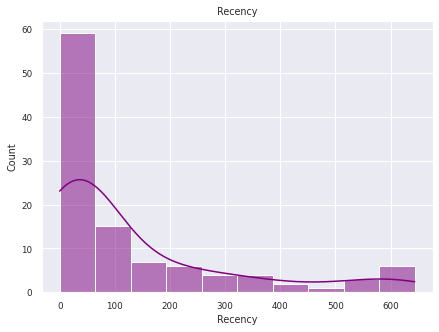

In [168]:
plt.figure(figsize=(7,5))
sns.set_theme(font_scale=0.8)
sns.histplot(data=rfm,x=rfm["Recency"], kde=True, color="Purple")
plt.title("Recency")
plt.show()

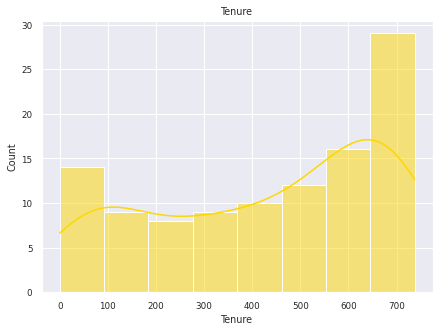

In [165]:
plt.figure(figsize=(7,5))
sns.set_theme(font_scale=0.8)
sns.histplot(data=rfm,x=rfm["Tenure"], kde=True, color="gold")
plt.title("Tenure")
plt.show()

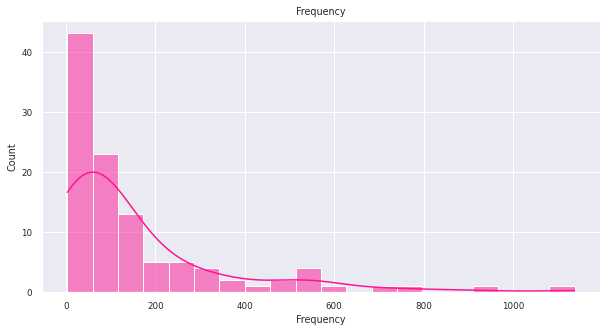

In [170]:
plt.figure(figsize=(10,5))
sns.set_theme(font_scale=0.8)
sns.histplot(data=rfm,x=rfm["Frequency"], kde=True, color="Deeppink")
plt.title("Frequency")
plt.show()

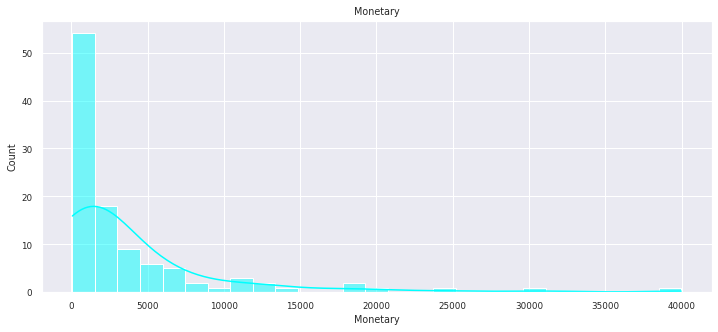

In [167]:
plt.figure(figsize=(12,5))
sns.set_theme(font_scale=0.8)
sns.histplot(data=rfm,x=rfm["Monetary"], kde=True, color="Cyan")
plt.title("Monetary")
plt.show()

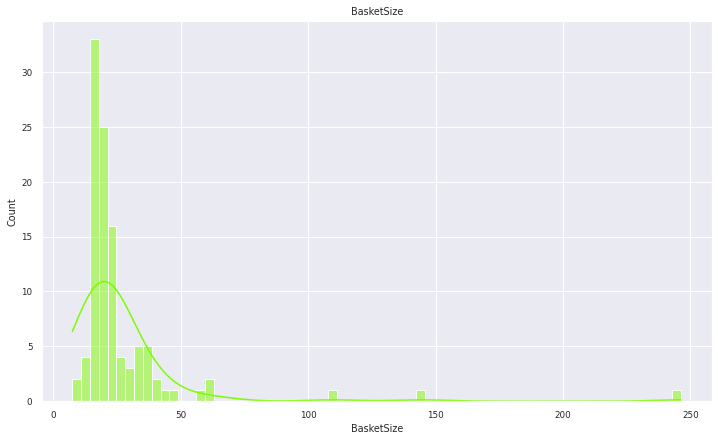

In [172]:
plt.figure(figsize=(12,7))
sns.set_theme(font_scale=0.8)
sns.histplot(data=rfm,x=rfm["BasketSize"], kde=True, color="Lawngreen")
plt.title("BasketSize")
plt.show()